In [125]:
### load the data
import pandas as pd
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/siribafna/CS4372_Assignment_1/master/autos.csv') # data on the web
print(df.head())
print('\nDimensions of data frame:', df.shape) # data exploration functions

   symboling normalized_losses         make fuel_type aspiration num_of_doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body_style drive_wheels engine_location  wheel_base  ...  engine_size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel_system  bore  stroke compression_ratio hor

In [127]:
df = df.replace('?', np.nan) # replace all the nulls 

In [128]:
df.isnull().sum() # how many nulls there are in each column

symboling             0
normalized_losses    41
make                  0
fuel_type             0
aspiration            0
num_of_doors          2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_of_cylinders      0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

In [129]:
df = df.dropna()
print('\nDimensions of data frame:', df.shape)


Dimensions of data frame: (159, 26)


In [130]:
df.head() # data exploration

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.5,2.8,8.8,101,5800,23,29,16430


In [131]:
df = df.drop(columns=['symboling', 'normalized_losses']) # dropping unrelated columns

In [167]:
df.make = df.make.astype('category').cat.codes
df.fuel_type = df.fuel_type.astype('category').cat.codes
df.aspiration = df.aspiration.astype('category').cat.codes
df.num_of_doors = df.num_of_doors.astype('category').cat.codes
df.body_style = df.body_style.astype('category').cat.codes
df.drive_wheels = df.drive_wheels.astype('category').cat.codes
df.engine_type = df.engine_type.astype('category').cat.codes
df.num_of_cylinders = df.num_of_cylinders.astype('category').cat.codes
df.fuel_system = df.fuel_system.astype('category').cat.codes
df.bore = df.bore.astype('category').cat.codes
df.stroke = df.stroke.astype('category').cat.codes
df.horsepower = df.horsepower.astype('category').cat.codes
df.peak_rpm = df.peak_rpm.astype('category').cat.codes
df.price = df.price.astype('category').cat.codes

In [168]:
# train test split
from sklearn.model_selection import train_test_split

X = df.iloc[:,9]
y = df.iloc[:,10]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

print('train size:', X_train.shape)
print('test size:', X_test.shape)

train size: (127,)
test size: (32,)


In [169]:
x = (X_train - X_train.mean()) / X_train.std()
x = np.c_[np.ones(X_train.shape[0]), x] 

In [176]:
# gradient descent using momentum optimizer
lr = .1
iterations = 70
num_points = y_train.size 
np.random.seed(123)
theta = np.random.rand(2)
gamma = .9

def gradient_descent(x, y_train, theta, iterations, lr):
    costs = []
    thetas = [theta] # prev thetas
    momentum = 0;
    for i in range(iterations):
        pred = np.dot(x, theta)
        error = pred - y_train
        cost = 1/(2*num_points) * np.dot(error.T, error)
        costs.append(cost)
        momentum = gamma*momentum + (lr * (1/num_points) * np.dot(x.T, error))
        theta = theta - momentum
        thetas.append(theta)
        log.append(theta)
        mse.append(mean_squared_error(y, (theta[0]*X + theta[1]))) 
    return thetas, costs
thetas, costs = gradient_descent(x, y_train, theta, iterations, lr)
theta = thetas[-1]

print("Gradient Descent: {:.2f}, {:.2f}".format(theta[0], theta[1]))
y_preds = theta[1]*x + theta[0] 

Gradient Descent: 54.99, 0.78


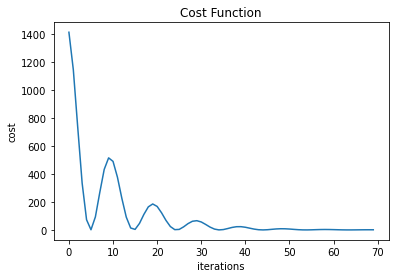

In [175]:
# visualizing cost function
import matplotlib.pyplot as plt
plt.title('Cost Function')
plt.xlabel('iterations')
plt.ylabel('cost')
plt.plot(costs)
plt.show()

In [162]:
x = df.width.to_numpy()
y = df.length.to_numpy()

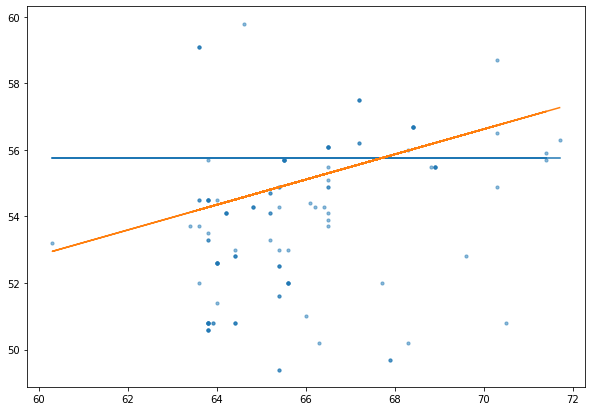

In [163]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train,s=10, alpha=.5, label='Y')
plt.plot(X_train, y_preds)